# Introduction
--- 

I have a background in bioinformatics and this dataset was one of my favorites in grad school. For my project in school, I analyzed the data in R but I have since adopted Python as my language of chocie. The aim of this kernel was to refresh myself and implement machine learning algorithms in Python. I accomplished what I wanted but I keep coming back to try new things. 
<br><br>

# About the original study
I need to re-read the study, but from what I recall, these gene expression values come from cancer  patients with either acute lymphocytic leukemia (ALL) or acute myeloid leukemia (AML). In the original study, this datset was used to classify which type of cancer each patient had based on measurements of their gene expressions. The study was published in 1999 and was the first(?) to show that cancer types can be determined based on gene expressions alone. 

# About the data
- Each row represents a different gene
- Columns 1 and 2 are descriptions about that gene 
- Each numbered column is a patient
- Each patient has 7129 gene expression values - i.e each patient has one value for each gene 
- The **training** data contain gene expression values for patients 1 through 38
- The **test** data contain gene expression values for patients 39 through 72
<br><br>


# To do list:
---
### General cleanup
- Write better functions (long term wish list,  maybe)

### Dimentionality reduction
- Kanavanand has a great PCA analysis [here](https://www.kaggle.com/kanav0183/pca-analysis-for-geneclassification)
     
### Implement more models
- Combine test and train data, then use 
- AdaBoost
- Gradientboost
- XGBoost

### Tuning Hyperparamters:
- Compare GridSearchCV to Bayesian Optimzation (I heard it's more efficient)
- Compare GridSearchCV to RandomizedSearchCV (I head it was more efficient)
    - Update: Randomized Search did do a better job of finding better parameters in 2/3 of cases (Found significantly better parameters for logistic regression, somewhat better parameters for KNN, and neither better nor worse for SVM)
<br><br>






# Data processing steps

1. Remove columns that contain "Call" data, I'm not sure what this is but it doesn't seem useful
2. Transpose the dataframe so that each row is a patient and each column is a gene
3. Remove gene description and set the gene accession numbers as the column headers
4. Merge the data (expression values) with the class labels (patient numbers)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [2]:
testfile='./gene-expression/data_set_ALL_AML_independent.csv'
trainfile='./gene-expression/data_set_ALL_AML_train.csv'
patient_cancer='./gene-expression/actual.csv'

train = pd.read_csv(trainfile)
test = pd.read_csv(testfile)
patient_cancer = pd.read_csv(patient_cancer)

In [3]:
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [4]:
# Remove "call" columns from training a test dataframes
train_keepers = [col for col in train.columns if "call" not in col]
test_keepers = [col for col in test.columns if "call" not in col]

train = train[train_keepers]
test = test[test_keepers]


In [5]:
train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [6]:
# Transpose the columns and rows so that genes become features and rows become observations
train = train.T
test = test.T
train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [7]:
# Clean up the column names for training data
train.columns = train.iloc[1]
train = train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Clean up the column names for training data
test.columns = test.iloc[1]
test = test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


### Combine the data (gene expression) with class labels (patient numbers)

In [8]:
# Reset the index. The indexes of two dataframes need to be the same before you combine them
train = train.reset_index(drop=True)

# Subset the first 38 patient's cancer types
pc_train = patient_cancer[patient_cancer.patient <= 38].reset_index(drop=True)

# Combine dataframes for first 38 patients: Patient number + cancer type + gene expression values
train = pd.concat([pc_train,train], axis=1)


# Handle the test data for patients 38 through 72
# Clean up the index
test = test.reset_index(drop=True)

# Subset the last patient's cancer types to test
pc_test = patient_cancer[patient_cancer.patient > 38].reset_index(drop=True)

# Combine dataframes for last patients: Patient number + cancer type + gene expression values
test = pd.concat([pc_test,test], axis=1)


# EDA
---

There's a bunch of data, so to speed things up I'm only using a small sample of the training data for the EDA.


In [9]:
sample = train.iloc[:,2:].sample(n=100, axis=1)
sample["cancer"] = train.cancer
sample.describe().round()

,X16323_at,X04828_at,U43527_at,Y00414_s_at,L13773_at,M74587_rna1_s_at,X95876_at,X71129_at,U79115_s_at,M75099_at,...,Z35278_at,L37378_at,M33772_s_at,S75313_at,D31888_at,U32581_at,S69965_at,L27943_at,D00763_at,M16441_cds1_at
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,54.0,1175.0,605.0,674.0,569.0,181.0,321.0,533.0,-21.0,782.0,...,182.0,38.0,16.0,-8.0,322.0,215.0,-251.0,1346.0,1576.0,-503.0
std,187.0,942.0,210.0,276.0,387.0,103.0,436.0,260.0,141.0,333.0,...,266.0,87.0,113.0,29.0,208.0,134.0,132.0,749.0,1131.0,287.0
min,-56.0,-603.0,179.0,103.0,97.0,10.0,-437.0,79.0,-340.0,182.0,...,-170.0,-170.0,-210.0,-90.0,56.0,-85.0,-586.0,338.0,470.0,-1136.0
25%,5.0,602.0,495.0,486.0,310.0,125.0,-76.0,348.0,-86.0,525.0,...,-0.0,-31.0,-66.0,-22.0,176.0,151.0,-301.0,907.0,814.0,-668.0
50%,18.0,1025.0,571.0,658.0,502.0,167.0,374.0,524.0,2.0,752.0,...,116.0,34.0,16.0,-6.0,274.0,200.0,-236.0,1148.0,1342.0,-402.0
75%,45.0,1490.0,706.0,831.0,638.0,200.0,571.0,651.0,86.0,1037.0,...,342.0,95.0,86.0,11.0,462.0,302.0,-170.0,1656.0,2034.0,-335.0
max,1149.0,4234.0,1131.0,1333.0,1823.0,613.0,1468.0,1316.0,273.0,1428.0,...,990.0,213.0,241.0,52.0,834.0,517.0,-54.0,3776.0,6521.0,204.0


# To standardize or not to standardize
---

This is for a visual reference on how data changes after scaling. And for the record, I use the words standardize and scale interchangably. I think it's technically "standardizing", but scikit-learn calls it scaling. 

Standardize  = For each value, subtract the mean and scale to unit variance




In [10]:
from sklearn import preprocessing

### Distribution of the random sample before standardizing
---

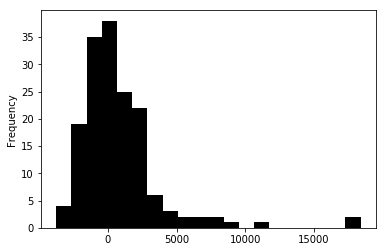

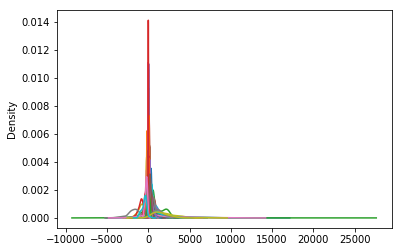

In [11]:
sample = sample.drop("cancer", axis=1)
sample.plot(kind="hist", legend=None, bins=20, color='k')
sample.plot(kind="kde", legend=None)

Depending on the random sample and the histogram-bin-kung-fu, the data usually has a long skinny tail to the right. This KDE plot shows the distribution of indivudal features, but it's not very helpful here. This will change after standardizing the data. 

### Distribution of the random sample after standardizing
---


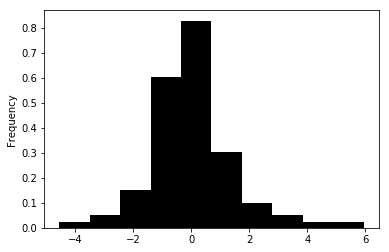

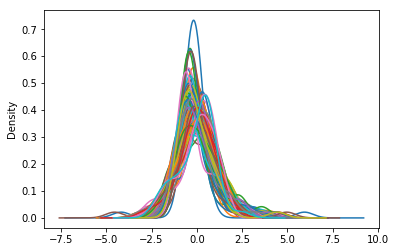

In [12]:
sample_scaled = pd.DataFrame(preprocessing.scale(sample))
sample_scaled.plot(kind="hist", normed=True, legend=None, bins=10, color='k')
sample_scaled.plot(kind="kde", legend=None)

There's quite a difference after standardizing the features. The KDE plot is much more useful in showing the individual distributions too. This is the result of subtracting the mean. Subtracting the mean from each feature centers them on zero. Neat!

# Process the full set
---




In [13]:
# Dimensionality reduction effects before and after scaling?
# from sklearn.decomposition import PCA

# StandardScaler to remove mean and scale to unit variance
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler().fit(train.iloc[:,2:])
scaled_train = scaler.transform(train.iloc[:,2:])
scaled_test = scaler.transform(test.iloc[:,2:])

x_train = train.iloc[:,2:]
y_train = train.iloc[:,1]
x_test = test.iloc[:,2:]
y_test = test.iloc[:,1]


# Classifiers
---

In [15]:
## Tuning parameters
# Grid Search for tuning parameters
from sklearn.model_selection import GridSearchCV
# RandomizedSearch for tuning (possibly faster than GridSearch)
from sklearn.model_selection import RandomizedSearchCV
# Bayessian optimization supposedly faster than GridSearch
#from bayes_opt import BayesianOptimization

import scipy

# Confusion matrix for model assessment
#from sklearn.metrics import confusion_matrix

# accuracy_score to calculate the... accuracy score
from sklearn.metrics import accuracy_score

## Benchmarkers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Because somewhat ~normally~ distributed I think?
from sklearn.naive_bayes import GaussianNB

# Non-parametric
from sklearn.tree import DecisionTreeClassifier

## Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## NeuralNet 
#from sklearn.neural_network import MLPClassifier

# Helper function

In [16]:
# CHERCHEZ FOR PARAMATERS
def cherchez(estimator, param_grid, search):
    """
    This is a helper function for tuning hyperparameters. 
    Methods can be GridSearchCV or RandomizedSearchCV.
    To do: Add Bayesian optimization
    """
    
    y_train=train.iloc[:,1]
    y_test=test.iloc[:,1]
    
    try:
        if search == "grid":
            clf = GridSearchCV(estimator=estimator, 
                               param_grid=param_grid, 
                               scoring=None,
                               n_jobs=-1, 
                               cv=10, 
                               verbose=1,
                               return_train_score=True)
        elif search == "random":
                clf = RandomizedSearchCV(estimator=estimator,
                                     param_distributions=param_grid,
                                     n_iter=10,
                                     n_jobs=-1,
                                     cv=10,
                                     verbose=1,
                                     random_state=1,
                                     return_train_score=True)
    except:
        print('Search has to be "grid" or "random"')
        sys.exit(0)
        

    # Fit the grid model
    clf.fit(X=scaled_train, y=y_train)
    
    # Predict 
    clf.predict(scaled_test)
    
    if estimator in ["KNeighborsClassifier()"]:
        return clf.score(scaled_test,y_test)
    else:
        return clf
    

# Benchmarkers

In [17]:
# Logistic Regression
# Paramaters
logreg_params = {} 
logreg_params["C"] =  [0.01, 0.1, 10, 100]
logreg_params["fit_intercept"] =  [True, False]
logreg_params["warm_start"] = [True,False]
logreg_params["random_state"] = [1]

lr_dist = {}
lr_dist["C"] = scipy.stats.expon(scale=.01)
lr_dist["fit_intercept"] =  [True, False]
lr_dist["warm_start"] = [True,False]
lr_dist["random_state"] = [1]

logregression_grid = cherchez(LogisticRegression(), logreg_params, search="grid")
print("Best score with GridSearchCV:", logregression_grid.best_score_)
print(logregression_grid.best_estimator_, "\n")

logregression_random = cherchez(LogisticRegression(), lr_dist, search="random")

print("Best score with RandomSearchCV:", logregression_random.best_score_)
print(logregression_random.best_estimator_)


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.3s


Best score with GridSearchCV: 0.605263157895
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=True) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.1s finished


Best score with RandomSearchCV: 0.710526315789
LogisticRegression(C=1.1438135864308593e-06, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


A randomized search for parameters worked great for this logistic regression! The score increased from 0.605 to 0.711!

<br><br>

In [18]:
# SVM
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100],
    "gamma": [0, .01, .1, 1, 5, 10, 100],
    "kernel": ["rbf"],
    "random_state": [1]
}

svm_dist = {
    "C": scipy.stats.expon(scale=.01),
    "gamma": scipy.stats.expon(scale=.01),
    "kernel": ["rbf"],
    "random_state": [1]
}

# Gridsearch
svm_grid = cherchez(SVC(), svm_param, "grid")
print("Best score with GridSearchCV:", svm_grid.best_score_)
print(svm_grid.best_estimator_, "\n")

# Random search
svm_random = cherchez(SVC(), svm_dist, "random")
print("Best score with RandomizedSearchCV:", svm_random.best_score_)
print(svm_random.best_estimator_, "\n")

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.7s


Best score with GridSearchCV: 0.710526315789
SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    1.9s finished


Best score with RandomizedSearchCV: 0.710526315789
SVC(C=0.0053960583725918545, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.012741252530133043,
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False) 



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished


A randomized search for parameters didn't yield any better results for this SVM :(

<br><br>

In [19]:
# KNN
knn_param = {
    "n_neighbors": [i for i in range(1,30,5)],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 10, 30],
    "p": [1,2]
}

knn_dist = {
    "n_neighbors": scipy.stats.randint(1,33),
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": scipy.stats.randint(1,1000),
    "p": [1,2]
}

knn_grid = cherchez(KNeighborsClassifier(), knn_param, "grid")
print(knn_grid.best_score_)
print(knn_grid.best_estimator_, "\n")


knn_random = cherchez(KNeighborsClassifier(), knn_dist, "random")
print(knn_random.best_score_)
print(knn_random.best_estimator_)



Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 922 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   23.6s finished


0.894736842105
KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=1,
           weights='distance') 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.868421052632
KNeighborsClassifier(algorithm='brute', leaf_size=314, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='uniform')


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


For KNN's the randomized search seems to be hit or miss. But I did manage to get some better paramters. So far, these parameters were the best:

`{'algorithm': 'kd_tree', 'leaf_size': 29, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}`

Might as well try a Gaussian Naive Bayes model



In [20]:
# Gaussian
gnb = GaussianNB()
gnb.fit(scaled_train, y_train)
pred = gnb.predict(x_test)
accuracy_score(y_test, pred, normalize=True)

0.67647058823529416

# Non-parametric

In [21]:
# Decision tree classifier
dtc_param = {
    "max_depth": [None],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "min_weight_fraction_leaf": [0.],
    "max_features": [None],
    "random_state": [4],
    "max_leaf_nodes": [None], # None = infinity or int
    "presort": [True, False]
}

dtc = cherchez(DecisionTreeClassifier(), dtc_param, "grid")
print(dtc.best_score_)
print(dtc.best_estimator_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   5 out of  20 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


0.973684210526
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=4,
            splitter='best')


# Ensembles:
Random Forest
- This one is annoying. When I was first setting it up, I got a really awesome accuracy, but forgot to see which random_state it was associated with. So now it's gone forever. But maybe it's a reason to iterate over random states too?

In [22]:
rf_param = {
    "n_estimators": [1,10,50,100,500,1000],
    "criterion": ["gini","entropy"],
    "max_features": ["auto"],
    "max_depth": [None,1,5,10],
    "max_leaf_nodes": [None],
    "oob_score": [False],
    "n_jobs": [-1],
    "warm_start": [False]
    #"random_state": [1]
}

rf = cherchez(RandomForestClassifier(), rf_param, "grid")
print("Best score:", rf.best_score_)
print(rf.best_estimator_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 463 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.2min finished


Best score: 0.921052631579
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# Sources:

Golub et al: https://www.ncbi.nlm.nih.gov/pubmed/10521349

Bayesian optimization: https://arxiv.org/pdf/1012.2599v1.pdf
